# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [1]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [2]:
%run 'FP-3 parse_data (copy of FP-2 parse_data).ipynb'

df.describe(include='all')


,grades,stress,studyhours,echours,sleephours,socialhours,activityhours
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,7.789825,2.366000,7.475800,1.990100,7.501250,2.704550,4.32830
std,0.746777,0.727536,1.423888,1.155855,1.460949,1.688514,2.51411
min,5.600000,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000
25%,7.250000,2.000000,6.300000,1.000000,6.200000,1.200000,2.40000
50%,7.780000,3.000000,7.400000,2.000000,7.500000,2.600000,4.10000
75%,8.320000,3.000000,8.700000,3.000000,8.800000,4.100000,6.10000
max,10.000000,3.000000,10.000000,4.000000,10.000000,6.000000,13.00000


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [3]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [4]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = df.apply(lambda x: central(x), axis=0)
    round_dict = {'grades': 1, 'stress': 1, 'density': 6, 'sugar': 3} #change this !!!!!!!!!
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,grades,stress,studyhours,echours,sleephours,socialhours,activityhours
mean,7.8,2.4,7.4758,1.9901,7.50125,2.70455,4.3283
median,7.8,3.0,7.4000,2.0000,7.50000,2.60000,4.1000
mode,7.8,3.0,6.3000,1.6000,5.40000,0.30000,4.3000


<br>

Let's repeat for a dispersion table:

</br>

In [5]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict            = {'quality': 3, 'acidity': 3, 'density': 6, 'sugar': 3}
    df_dispersion         = df.apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,grades,stress,studyhours,echours,sleephours,socialhours,activityhours
st.dev.,0.74659,0.727354,1.423532,1.155566,1.460583,1.688092,2.513481
min,5.60000,1.000000,5.000000,0.000000,5.000000,0.000000,0.000000
max,10.00000,3.000000,10.000000,4.000000,10.000000,6.000000,13.000000
range,4.40000,2.000000,5.000000,4.000000,5.000000,6.000000,13.000000
25th,7.25000,2.000000,6.300000,1.000000,6.200000,1.200000,2.400000
75th,8.32000,3.000000,8.700000,3.000000,8.800000,4.100000,6.100000
IQR,1.07000,1.000000,2.400000,2.000000,2.600000,2.900000,3.700000


The variables were already given easier names in the parsa_data file, so we don't need to do that anymore!

Let's create scatterplots for the DV (quality) vs. each of the three IVs (acid, density, sugar):

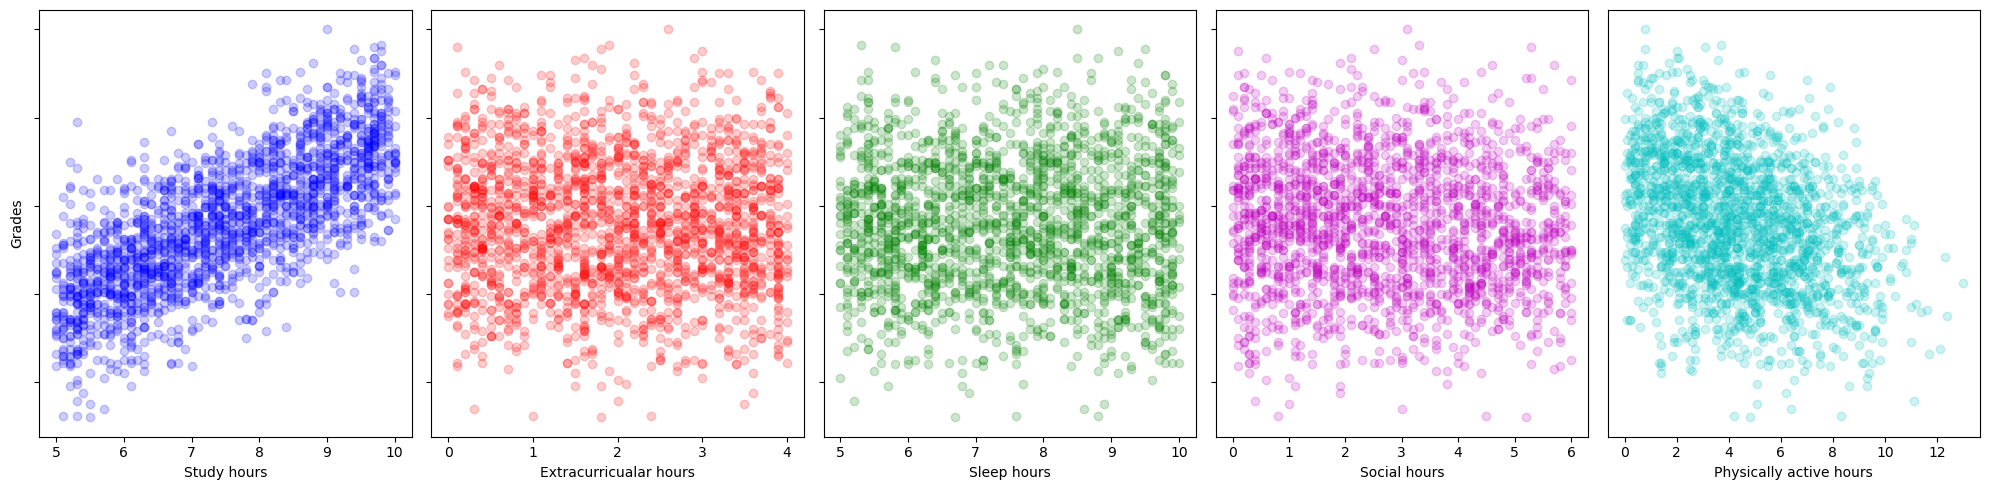

In [6]:

fig,axs = plt.subplots( 1, 5, figsize=(20,5), tight_layout=True )
plt.yticks([1, 2, 3], ['Low', 'Moderate', 'High'])
axs[0].scatter( df['studyhours'], df['grades'], alpha=0.2, color='b' )
axs[1].scatter( df['echours'], df['grades'], alpha=0.2, color='r' )
axs[2].scatter( df['sleephours'], df['grades'], alpha=0.2, color='g' )
axs[3].scatter( df['socialhours'], df['grades'], alpha=0.2, color='m' )
axs[4].scatter( df['activityhours'], df['grades'], alpha=0.2, color='c' )

xlabels = 'Study hours', 'Extracurricualar hours', 'Sleep hours', 'Social hours', 'Physically active hours'
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('Grades')
[ax.set_yticklabels([])  for ax in axs[0:]]
plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [7]:
for col in ['studyhours', 'echours', 'sleephours', 'socialhours', 'activityhours']:
    print(col, len(df[col]), len(df['grades']))


studyhours 2000 2000
echours 2000 2000
sleephours 2000 2000
socialhours 2000 2000
activityhours 2000 2000


In [8]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


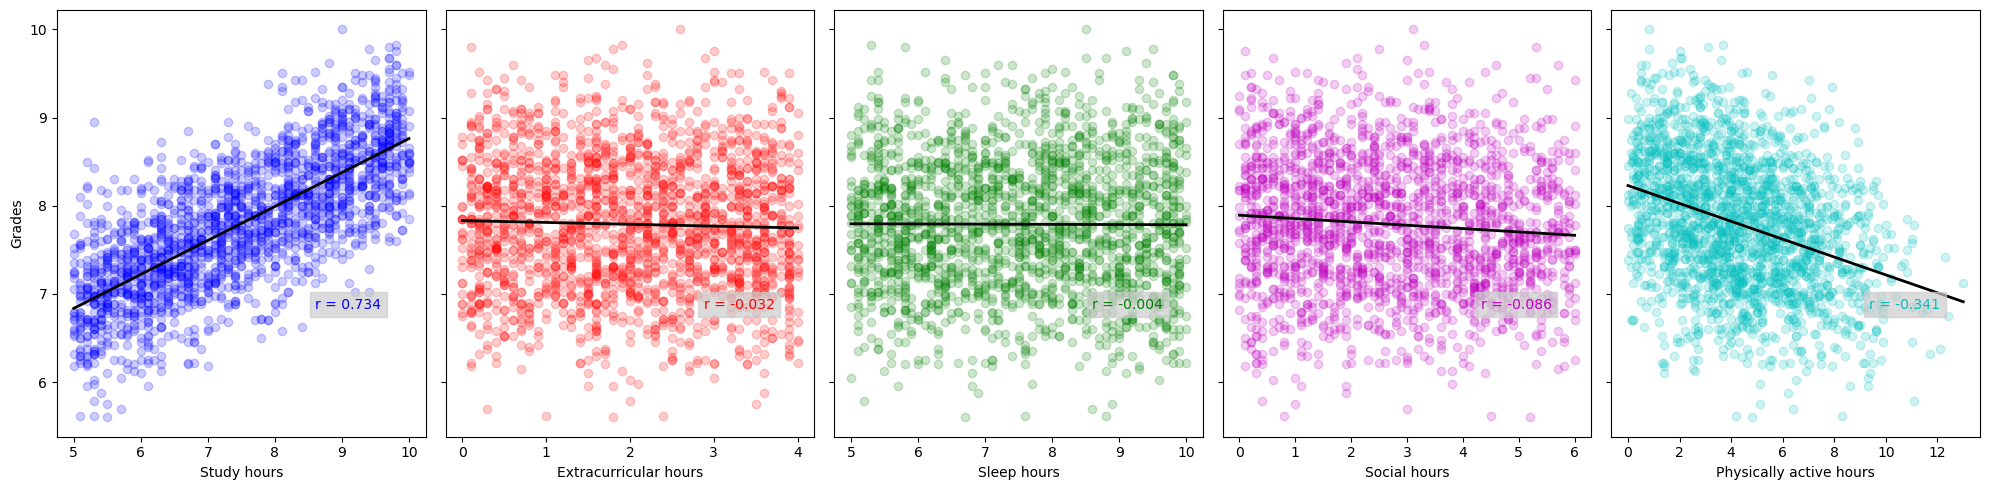

In [9]:
fig, axs = plt.subplots(1, 5, figsize=(20,5), tight_layout=True)

ivs = [df['studyhours'].values,
       df['echours'].values,
       df['sleephours'].values,
       df['socialhours'].values,
       df['activityhours'].values]

colors = ['b', 'r', 'g', 'm', 'c']

for ax, x, c in zip(axs, ivs, colors):
    ax.scatter(x, df['grades'].values, alpha=0.2, color=c)
    plot_regression_line(ax, x, df['grades'].values, color='k', ls='-', lw=2)
    r = corrcoeff(x, df['grades'].values)
    ax.text(0.7, 0.3, f'r = {r:.3f}', color=c,
            transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

xlabels = ['Study hours', 'Extracurricular hours', 'Sleep hours', 'Social hours', 'Physically active hours']
[ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]
axs[0].set_ylabel('Grades')
[ax.set_yticklabels([]) for ax in axs[1:]]
plt.show()


* The first plot has a high correlation.
* The correlation for plots 2,3 and 4 is very low.
* The last plot shows a low correlation. 

Since it is very plausible that the correlation between lifestyle factors and grades could be different, it may be interesting to give the high and low grades different colors for the variables that did not show a good correlation. We will color everyting above the median grade red and everything below blue. Let's also draw separate regression lines.


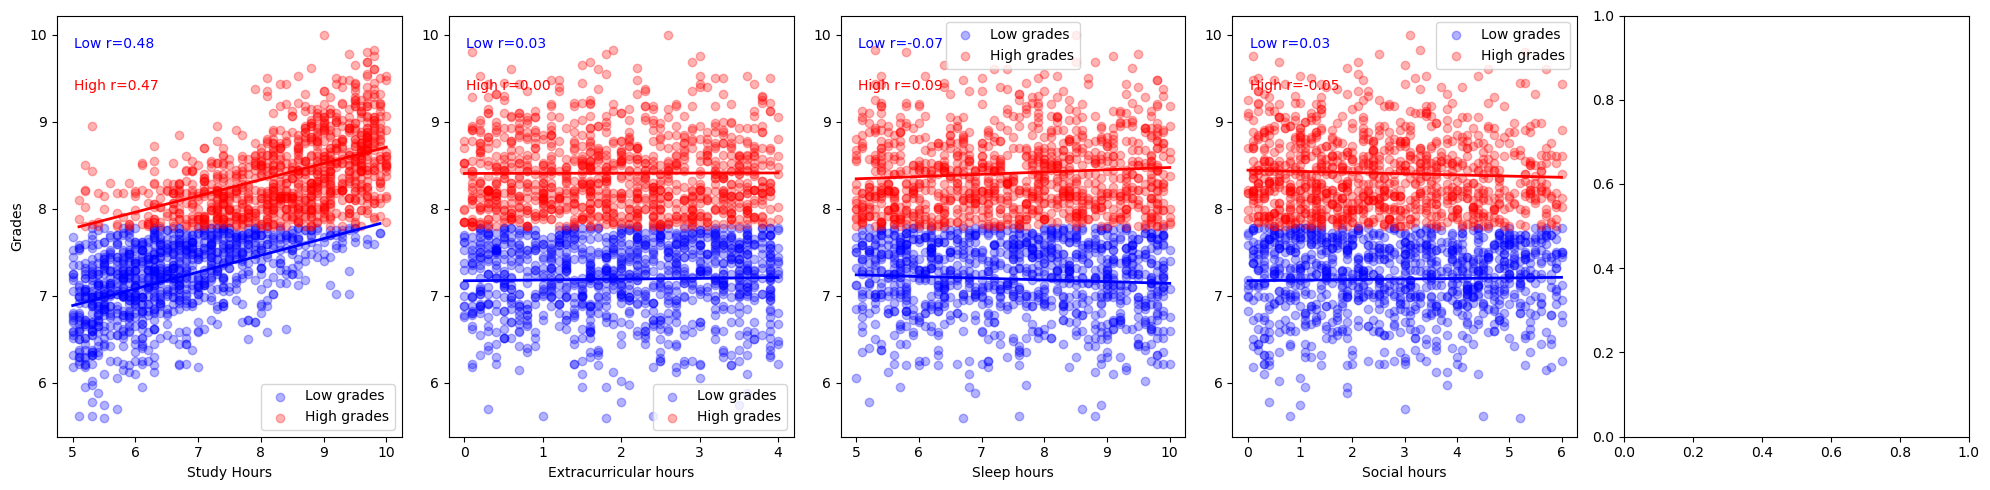

In [10]:
import matplotlib.pyplot as plt
import numpy as np

ivs = ['studyhours','echours', 'sleephours', 'socialhours', 'activityhours']
xlabels = ['Study Hours','Extracurricular hours', 'Sleep hours', 'Social hours', 'Physically active hours']
colors = ['b', 'g', 'm', 'c']

threshold = df['grades'].median()
low_grades = df[df['grades'] <= threshold]
high_grades = df[df['grades'] > threshold]

fig, axs = plt.subplots(1, len(ivs), figsize=(20,5), tight_layout=True)
for ax, col, label, c in zip(axs, ivs, xlabels, colors):
    if len(low_grades) > 0:
        ax.scatter(low_grades[col], low_grades['grades'], alpha=0.3, color='b', label='Low grades')
        plot_regression_line(ax, low_grades[col].values, low_grades['grades'].values, color='b', lw=2)
        r_low = np.corrcoef(low_grades[col], low_grades['grades'])[0,1]
        ax.text(0.05, 0.95, f'Low r={r_low:.2f}', transform=ax.transAxes, color='b', fontsize=10, verticalalignment='top')
    if len(high_grades) > 0:
        ax.scatter(high_grades[col], high_grades['grades'], alpha=0.3, color='r', label='High grades')
        plot_regression_line(ax, high_grades[col].values, high_grades['grades'].values, color='r', lw=2)
        r_high = np.corrcoef(high_grades[col], high_grades['grades'])[0,1]
        ax.text(0.05, 0.85, f'High r={r_high:.2f}', transform=ax.transAxes, color='r', fontsize=10, verticalalignment='top')
    ax.set_xlabel(label)
    ax.set_ylabel('Grades' if col==ivs[0] else '')
    ax.legend()
plt.show()


Seperating the low and high scoring students does not seem to add any info to the analysis.

Let's make a plot that show all of the plots to display in tha main file.

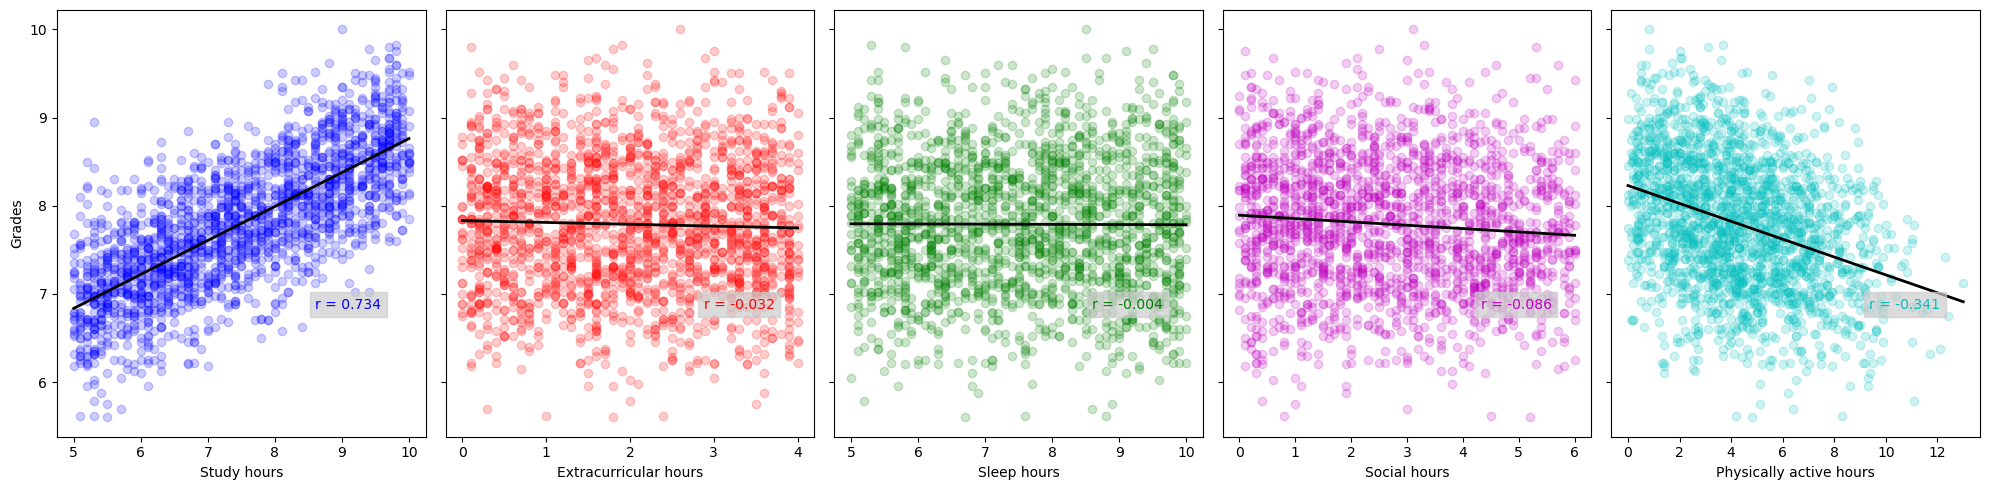

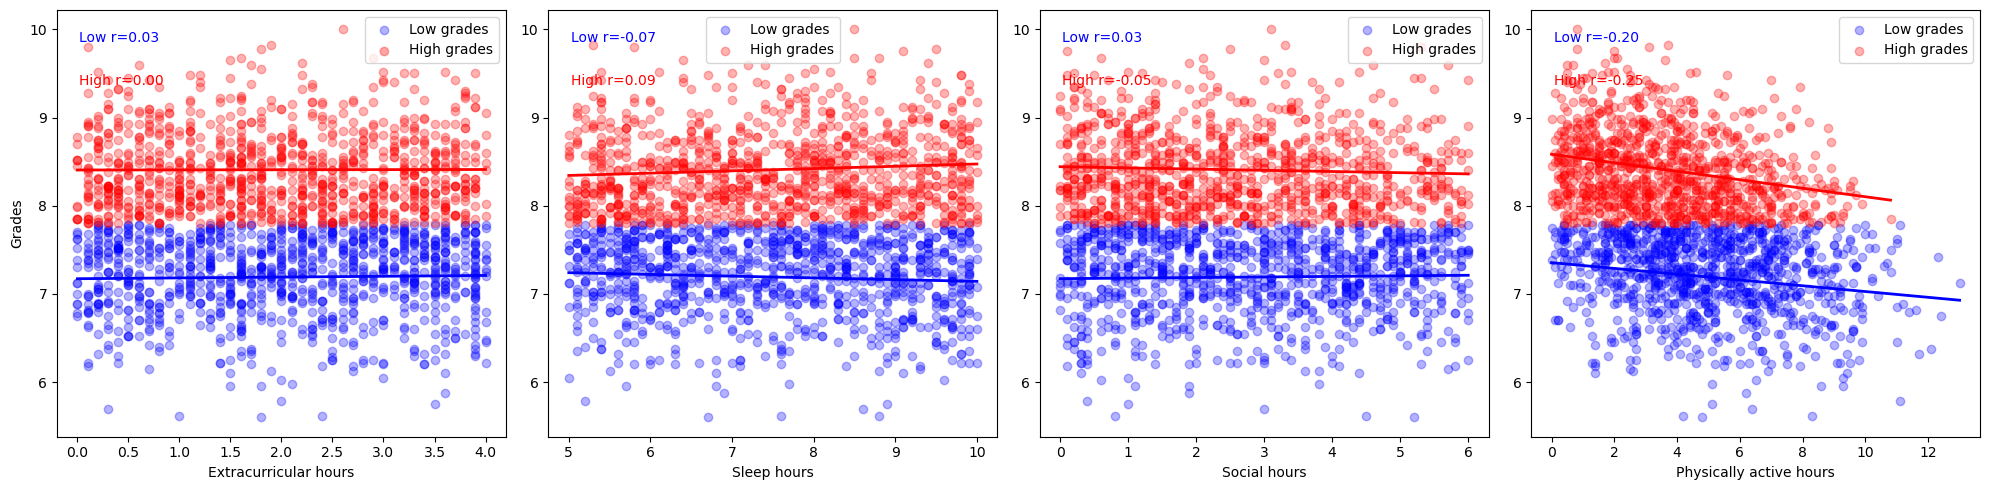

In [11]:
def plot_descriptive():
    """
    Generates two separate figures, one below the other, by executing 
    the two plotting blocks sequentially.
    """
    
    # --- PLOT 1: Scatter plots with single regression line for all variables ---
    
    fig, axs = plt.subplots(1, 5, figsize=(20,5), tight_layout=True)

    ivs = [df['studyhours'].values,
           df['echours'].values,
           df['sleephours'].values,
           df['socialhours'].values,
           df['activityhours'].values]

    colors = ['b', 'r', 'g', 'm', 'c']

    for ax, x, c in zip(axs, ivs, colors):
        ax.scatter(x, df['grades'].values, alpha=0.2, color=c)
        plot_regression_line(ax, x, df['grades'].values, color='k', ls='-', lw=2)
        r = corrcoeff(x, df['grades'].values)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c,
                transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    xlabels = ['Study hours', 'Extracurricular hours', 'Sleep hours', 'Social hours', 'Physically active hours']
    [ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]
    axs[0].set_ylabel('Grades')
    [ax.set_yticklabels([]) for ax in axs[1:]]
    plt.show()

    # --- PLOT 2: Scatter plots with two regression lines (High/Low Grades) ---
    
    # Redefining imports inside the function is unnecessary if they're in previous cells, 
    # but I'll keep the logic as provided in your second block.
    # import matplotlib.pyplot as plt # Already imported in notebook setup
    # import numpy as np # Already imported in notebook setup

    ivs = ['echours', 'sleephours', 'socialhours', 'activityhours']
    xlabels = ['Extracurricular hours', 'Sleep hours', 'Social hours', 'Physically active hours']
    colors = ['b', 'g', 'm', 'c']

    threshold = df['grades'].median()
    low_grades = df[df['grades'] <= threshold]
    high_grades = df[df['grades'] > threshold]

    fig, axs = plt.subplots(1, len(ivs), figsize=(20,5), tight_layout=True)
    for ax, col, label, c in zip(axs, ivs, xlabels, colors):
        if len(low_grades) > 0:
            ax.scatter(low_grades[col], low_grades['grades'], alpha=0.3, color='b', label='Low grades')
            plot_regression_line(ax, low_grades[col].values, low_grades['grades'].values, color='b', lw=2)
            r_low = np.corrcoef(low_grades[col], low_grades['grades'])[0,1]
            ax.text(0.05, 0.95, f'Low r={r_low:.2f}', transform=ax.transAxes, color='b', fontsize=10, verticalalignment='top')
        if len(high_grades) > 0:
            ax.scatter(high_grades[col], high_grades['grades'], alpha=0.3, color='r', label='High grades')
            plot_regression_line(ax, high_grades[col].values, high_grades['grades'].values, color='r', lw=2)
            r_high = np.corrcoef(high_grades[col], high_grades['grades'])[0,1]
            ax.text(0.05, 0.85, f'High r={r_high:.2f}', transform=ax.transAxes, color='r', fontsize=10, verticalalignment='top')
        ax.set_xlabel(label)
        ax.set_ylabel('Grades' if col==ivs[0] else '')
        ax.legend()
    plt.show()
    
# Example usage:
plot_descriptive()